In [1]:
import pandas as pd
import numpy as np

##시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [45]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


### 데이터프레임 통계함수 디폴트( 컬럼별) 
##### axis=1 (row별)

In [4]:
df.sum() #axis=0

eng     160
kor     200
math    230
dtype: int64

In [6]:
df.sum( axis=1) #

a    120
b    120
c    130
d    220
dtype: int64

In [8]:
df.sum().sum()  #df.values.sum()

590

In [12]:
df.unstack().sum()

590

In [13]:
df.mean()

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [14]:
df.mean(axis=1)

a    40.000000
b    40.000000
c    43.333333
d    73.333333
dtype: float64

In [15]:
df.max()

eng     70
kor     80
math    90
dtype: int64

In [16]:
df.max(axis=1)

a    90
b    50
c    60
d    80
dtype: int64

In [17]:
df.idxmax()

eng     d
kor     d
math    a
dtype: object

In [18]:
df.idxmax(axis=1)

a    math
b    math
c     kor
d     kor
dtype: object

In [20]:
df.max().max()

90

In [21]:
df.median()

eng     40.0
kor     50.0
math    60.0
dtype: float64

In [22]:
df.median(axis=1)

a    20.0
b    40.0
c    50.0
d    70.0
dtype: float64

In [24]:
df.unstack().median()

50.0

In [26]:
df.mean(axis=1).round(2)

a    40.00
b    40.00
c    43.33
d    73.33
dtype: float64

In [27]:
df.round(2)

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [28]:
df.std()

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [30]:
df.quantile( q=[0.25,0.5,0.75] )

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [31]:
df.nlargest(2, 'math')

,eng,kor,math
a,10,20,90
d,70,80,70


In [32]:
df.describe()

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [33]:
df.describe().loc['count']

eng     4.0
kor     4.0
math    4.0
Name: count, dtype: float64

In [34]:
df.count()

eng     4
kor     4
math    4
dtype: int64

In [35]:
def fn( v ):
    print("========")
    print( "v=", v)
    print("========")
    return v.sum()

In [36]:
df.apply( fn )

v= a    10
b    30
c    50
d    70
Name: eng, dtype: int64
v= a    20
b    40
c    60
d    80
Name: kor, dtype: int64
v= a    90
b    50
c    20
d    70
Name: math, dtype: int64


eng     160
kor     200
math    230
dtype: int64

In [38]:
df.apply( fn , axis=1 )

v= eng     10
kor     20
math    90
Name: a, dtype: int64
v= eng     30
kor     40
math    50
Name: b, dtype: int64
v= eng     50
kor     60
math    20
Name: c, dtype: int64
v= eng     70
kor     80
math    70
Name: d, dtype: int64


a    120
b    120
c    130
d    220
dtype: int64

In [39]:
df.apply( lambda v: v.sum() )

eng     160
kor     200
math    230
dtype: int64

In [40]:
df.apply( lambda v: v.sum(), axis=1 )

a    120
b    120
c    130
d    220
dtype: int64

In [ ]:
#국어,영어,수학점수의 평균이 70점이상이면
# '합격' 아니면 '불합격' 으로 결과 컬과 컬럼을 추가하세요

In [41]:
df.apply(lambda v: '합격' if v.mean() >= 70 else '불합격', axis=1)

a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [42]:
df['결과'] = df.apply(lambda v: '합격' if v.mean() >= 70 else '불합격', axis=1)

In [ ]:
#df['결과'] = df[['eng','kor','math']].apply(lambda v: '합격' if v.mean() >= 70 else '불합격', axis=1)

### 시각화

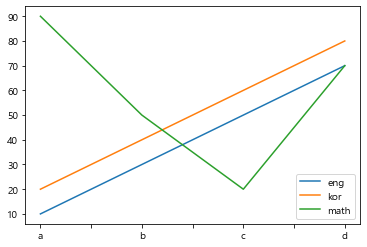

In [47]:
df.plot()
plt.show()

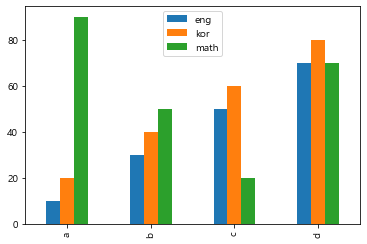

In [48]:
df.plot(kind='bar')
plt.show()

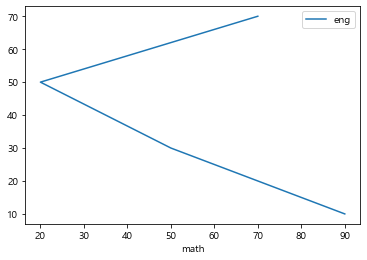

In [49]:
df.plot( x='math', y='eng' )
plt.show()

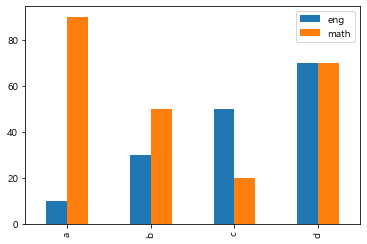

In [51]:
df.plot(kind='bar', y=['eng','math'])
plt.show()

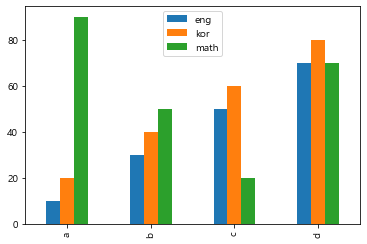

In [54]:
df.plot(kind='bar')
plt.show()

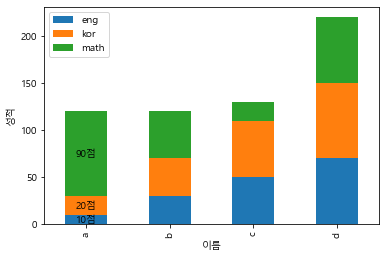

In [66]:
df.plot(kind='bar', stacked=True)
plt.xlabel( '이름')
plt.ylabel('성적')
plt.text( 0,10/2, '10점',va='center', ha='center')
plt.text( 0,10+20/2, '20점',va='center', ha='center')
plt.text( 0,10+20+90/2, '90점',va='center', ha='center')
plt.show()

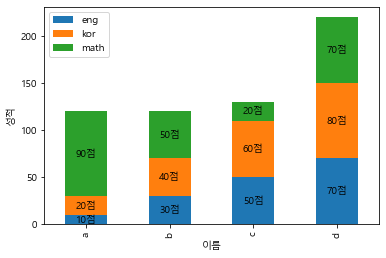

In [77]:
df.plot(kind='bar', stacked=True)
plt.xlabel( '이름')
plt.ylabel('성적')
n = 0
for i, sr in df.iterrows():
    plt.text( n,sr['eng']/2, f"{ sr['eng'] }점",va='center', ha='center')
    plt.text( n,sr['eng']+sr['kor']/2, f"{ sr['kor'] }점",va='center', ha='center')
    plt.text( n,sr['eng']+sr['kor']+sr['math']/2,f"{ sr['math'] }점",va='center', 
             ha='center')
    n+=1
plt.show()

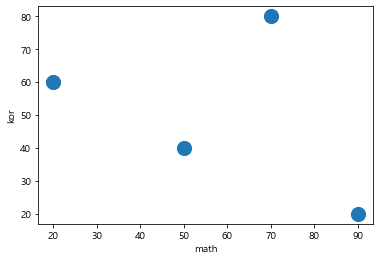

In [82]:
df.plot(kind='scatter', x='math' ,y='kor', s=200)
plt.show()

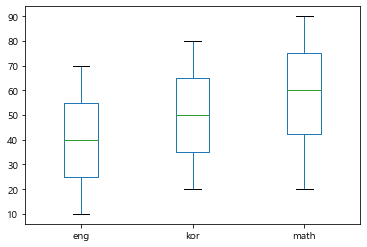

In [83]:
df.plot( kind='box')
plt.show()

In [75]:
for i, sr in df.iterrows():
    print(i, sr['eng'], sr['kor'], sr['math'] )

a 10 20 90
b 30 40 50
c 50 60 20
d 70 80 70


In [67]:
for n in df: #df.columns
    print(n)

eng
kor
math


In [70]:
for c, sr in df.items():
    print( c, sr['a'], sr['b'],sr['c'],sr['d'] )

eng 10 30 50 70
kor 20 40 60 80
math 90 50 20 70


In [72]:
for i, sr in df.iterrows():
    print(i, sr['eng'], sr['kor'], sr['math'] )

a 10 20 90
b 30 40 50
c 50 60 20
d 70 80 70


In [84]:
df.to_csv('a.csv')

In [74]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
